In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tqdm import tqdm
import matplotlib.animation as animation
from scipy.spatial import distance_matrix
import imageio

%matplotlib widget

mkdir: cannot create directory ‘frames’: File exists


/tmp/ipykernel_3717/538327406.py:89: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread("frames/" + str(counter)+ ".png"))


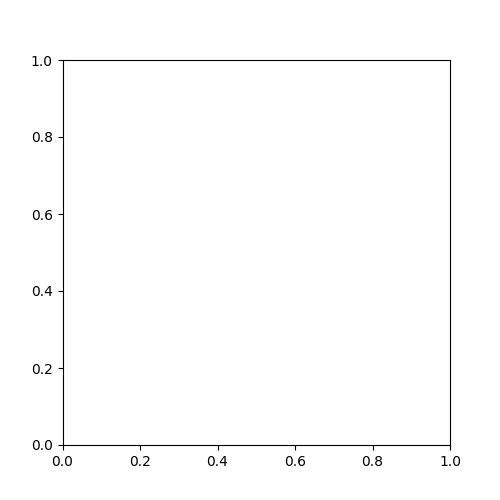

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

class Agent():
    def __init__(self,x,y,infected,resistance,infectedCounter = 0):
        #initalize position
        self.x = x
        self.y = y
        self.infected = infected
        self.resistance = resistance
        self.infectedCounter = infectedCounter 
        
    def movement(self,stepSize,xBounds,yBounds):
        #step
        self.x += stepSize*np.random.uniform(-1,1)
        self.y += stepSize*np.random.uniform(-1,1)
        
        #check boundaries
        if self.x < xBounds[0]:
            self.x = xBounds[0]
        elif self.x > xBounds[1]:
            self.x = xBounds[1]
        
        if self.y < yBounds[0]:
            self.y = yBounds[0]
        elif self.y > yBounds[1]:
            self.y = yBounds[1]
            
        #Tick down infeced counter
        if self.infected == True:
            self.infectedCounter -= 1
            if self.infectedCounter <= 0:
                self.infected = False
        
    def infect(self):
        infectRoll = np.random.uniform()
        
        if self.infected == False and infectRoll > self.resistance:
            self.infected = True
            self.infectedCounter = 50
            self.resistance *= 1.5

def getPosition(agents):
    positions = []
    for agent in agents:
        positions.append([agent.x,agent.y])
    positions = np.array(positions)
    return positions

def moveAgents(agents,stepSize,xBounds,yBounds):
    for i in range(0,len(agents)):
        agents[i].movement(stepSize,xBounds,yBounds)
    return agents

def getInfected(agents):
    infected  = []
    for agent in agents:
        infected.append(agent.infected)
    return infected

def getCloseAgents(distanceMatrix,agentNumber):
    sort = np.argsort(distanceMatrix[agentNumber])
    closeMask = distanceMatrix[agentNumber][sort] < 10
    closeAgents = np.argsort(distanceMatrix[agentNumber])[closeMask][1:]
    return closeAgents

def rollInfect(agents):
    positions = getPosition(agents)
    distanceMatrix = distance_matrix(positions,positions)
    for i in range(0,len(agents)):
        closeAgents = getCloseAgents(distanceMatrix,i)
        for j in closeAgents:
            if agents[j].infected == True:
                agents[i].infect()
    return agents

def makeGif(frames,name):
    !mkdir frames
    
    counter=0
    images = []
    for i in range(0,len(frames)):
        plt.figure(figsize = (6,6))
        plt.scatter(frames[i][0],frames[i][1], c = frames[i][2], cmap = "RdYlGn_r")
        plt.title("Infected = " + str(np.sum(frames[i][2])))
        plt.tick_params(left = False, right = False , labelleft = False,labelbottom = False, bottom = False)
        plt.savefig("frames/" + str(counter)+ ".png")
        images.append(imageio.imread("frames/" + str(counter)+ ".png"))
        counter += 1
        plt.close()
        
    imageio.mimsave(name, images)
        
    !rm -r frames

agents = []
for i in range(0,500):
    x = np.random.uniform(0,500)
    y = np.random.uniform(0,500)
    agents.append(Agent(x,y,0,.3))
    
for i in range(0,10):
    agents[i].infected = 1
    agents[i].infectedCounter = 50
    
stepSize = 5
xBounds = [0,500]
yBounds = [0,500]

frames = []
for i in range(0,500):
    agents = moveAgents(agents,stepSize,xBounds,yBounds)
    agents = rollInfect(agents)
    positions = getPosition(agents)
    infected = getInfected(agents)
    frames.append([positions[:,0] , positions[:,1], infected])
    

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
def animate(i):
    x, y = frames[i]
    ax.clear()
    # Plot that point using the x and y coordinates
    ax.scatter(x, y)

makeGif(frames,"Simulation.gif")